In [3]:
#IMPORTING THE MODULES
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import binom,poisson
import pylab as pl
import scipy.stats as stats

In [4]:
#READING THE DATASET THAT IS IN CSV FORMAT
data = pd.read_csv('honda_sell_data.csv')

#EXTRACTING FIRST FIVE VALUES OF THE DATASET
data.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,NaN,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


In [11]:
#CHECKING IF THERE IS ANY NaN VALUES IN DATASET
data.isnull().any()

Year                       False
Make                       False
Model                      False
Condition                  False
Price                       True
Consumer_Rating            False
Consumer_Review_#          False
Exterior_Color              True
Interior_Color              True
Drivetrain                  True
MPG                         True
Fuel_Type                   True
Transmission                True
Engine                      True
VIN                         True
Stock_#                     True
Mileage                     True
Comfort_Rating              True
Interior_Design_Rating      True
Performance_Rating          True
Value_For_Money_Rating      True
Exterior_Styling_Rating     True
Reliability_Rating          True
State                       True
Seller_Type                 True
dtype: bool

In [12]:
#SUM OF THE NaN VALUES IN THE DATASET
data.isnull().sum()

Year                          0
Make                          0
Model                         0
Condition                     0
Price                        39
Consumer_Rating               0
Consumer_Review_#             0
Exterior_Color              107
Interior_Color              721
Drivetrain                   16
MPG                        1489
Fuel_Type                    11
Transmission                 37
Engine                       11
VIN                          11
Stock_#                      11
Mileage                     295
Comfort_Rating              552
Interior_Design_Rating      552
Performance_Rating          552
Value_For_Money_Rating      552
Exterior_Styling_Rating     552
Reliability_Rating          552
State                        73
Seller_Type                  73
dtype: int64

In [13]:
#PRINTING THE DATATYPES OF THE DIFFERENT COLUMNS 
print(data.dtypes)

Year                         int64
Make                        object
Model                       object
Condition                   object
Price                       object
Consumer_Rating            float64
Consumer_Review_#            int64
Exterior_Color              object
Interior_Color              object
Drivetrain                  object
MPG                        float64
Fuel_Type                   object
Transmission                object
Engine                      object
VIN                         object
Stock_#                     object
Mileage                     object
Comfort_Rating             float64
Interior_Design_Rating     float64
Performance_Rating         float64
Value_For_Money_Rating     float64
Exterior_Styling_Rating    float64
Reliability_Rating         float64
State                       object
Seller_Type                 object
dtype: object


In [14]:
#REPLACING THE NaN VALUES IN THE DATASET WITH THEI MEAN TO MAKE ANALYSIS MORE ACCURATE
data['MPG'] = data['MPG'].fillna(data['MPG'].mean())
data['Comfort_Rating'] = data['Comfort_Rating'].fillna(data['Comfort_Rating'].mean())
data['Performance_Rating'] = data['Performance_Rating'].fillna(data['Performance_Rating'].mean())
data['Value_For_Money_Rating'] = data['Value_For_Money_Rating'].fillna(data['Value_For_Money_Rating'].mean())
data['Exterior_Styling_Rating'] = data['Exterior_Styling_Rating'].fillna(data['Exterior_Styling_Rating'].mean())
data['Reliability_Rating'] = data['Reliability_Rating'].fillna(data['Reliability_Rating'].mean())

#REPLACING THE PRICE NaN VALUES WITH 0  
data['Price'] = data['Price'].fillna(0)

In [15]:
print(data['Price'] .dtype)
 
 
# drop the NaN values
data = data.dropna()
 
# display
print(data)

object
      Year   Make                      Model Condition    Price  \
0     2023  Honda              Ridgeline RTL       New  $46,370   
2     2023  Honda          CR-V Hybrid Sport       New  $34,245   
3     2022  Honda           Pilot TrailSport       New  $46,500   
4     2023  Honda  CR-V Hybrid Sport Touring       New  $40,395   
5     2023  Honda               Odyssey EX-L       New  $42,250   
...    ...    ...                        ...       ...      ...   
4993  2019  Honda              Passport EX-L      Used  $28,955   
4994  2018  Honda               Accord Sport      Used  $19,999   
4995  2020  Honda                     Fit LX      Used  $17,495   
4996  2018  Honda                Civic Sport      Used  $19,500   
4997  2011  Honda                Accord EX-L      Used  $17,998   

      Consumer_Rating  Consumer_Review_#           Exterior_Color  \
0                 4.8                  9     Platinum White Pearl   
2                 4.7               2869  Meteorit

In [16]:
# convert to integer type for Price column
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].astype(float)
 
# display data type
data['Price'].dtype

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/3033687332.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


dtype('float64')

In [17]:
#DROPING THE NULL DATA 
data = data.dropna()

In [18]:
#COUNTING SUM OF OCCURENCE OF DIFFERENT YEARS TO KNOW WHEN WAS THE SALES MORE
data['Year'].value_counts()

2022    1143
2023     811
2019     330
2021     282
2020     282
2018     160
2017      99
2016      93
2015      58
2014      36
2013      30
2012      21
2009      20
2011      20
2008      20
2010      19
2007      16
2006      13
2005      10
2001       5
2004       4
2003       3
2002       3
1997       2
2000       2
1989       1
1991       1
1992       1
1998       1
1999       1
Name: Year, dtype: int64

In [19]:
#CALCULATING MEAN MODE COUNT STANDARD DEVIATION MAX VALUES USING describe()
data.describe()

,Year,Price,Consumer_Rating,Consumer_Review_#,MPG,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,3487.000000,3487.00000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,2020.271580,33109.82191,4.586292,1134.391167,27.722761,4.820075,4.706280,4.668884,4.584371,4.736048,4.864640
std,3.678246,10044.53185,0.514852,1807.798132,6.177631,0.256613,0.478539,0.349795,0.370885,0.309247,0.191163
min,1989.000000,1995.00000,1.300000,0.000000,13.000000,3.800000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,2019.000000,26919.50000,4.400000,102.500000,22.500000,4.750000,4.700000,4.500000,4.300000,4.700000,4.800000
50%,2022.000000,33800.00000,4.700000,591.000000,27.822450,4.900000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,2022.000000,41375.00000,4.900000,1559.000000,31.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,69980.00000,5.000000,29258.000000,52.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [20]:
##COUNTING SUM OF OCCURENCE OF DIFFERENT MODELS
data['Model'].value_counts()

CR-V EX-L                    205
Pilot EX-L                   163
Pilot Sport                  161
Accord Sport 1.5T            152
CR-V Hybrid Sport Touring    145
                            ... 
Accord Crosstour               1
Civic LX-S                     1
CR-Z LX                        1
CR-Z Base (M6)                 1
Accord EX-L V-6                1
Name: Model, Length: 135, dtype: int64

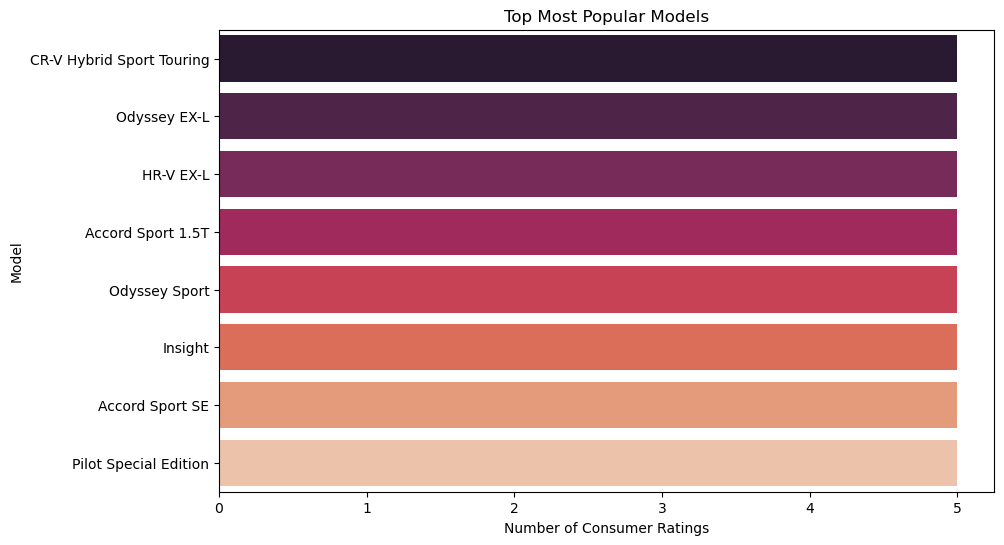

In [21]:
# Cast the Consumer_Rating column to a numeric data type
data['Consumer_Rating'] = pd.to_numeric(data['Consumer_Rating'], errors='coerce')

# Sort by number of reviews in descending order
most_selled_model = data.sort_values(by='Consumer_Rating', ascending=False).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10 ,6 ))
sns.barplot(x='Consumer_Rating', y='Model', data=most_selled_model, palette='rocket')
plt.title('Top Most Popular Models')
plt.xlabel('Number of Consumer Ratings')
plt.ylabel('Model')
plt.show()

In [22]:
#mean, mode and median of consumer ratings of each model

# Convert the Reviews column to numeric type
data['Consumer_Rating'] = pd.to_numeric(data['Consumer_Rating'])

# Calculate the mean, mode, and median number of reviews for each category
category_stats = data.groupby('Model')['Consumer_Rating'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Print the results
print(category_stats)

                           mean  median  <lambda_0>
Model                                              
Accord Crosstour       4.700000    4.70         4.7
Accord Crosstour EX-L  3.725000    3.90         2.4
Accord EX              4.550000    4.65         4.8
Accord EX 1.5T         4.366667    4.50         3.8
Accord EX-L            4.572414    4.70         4.7
...                         ...     ...         ...
Ridgeline SE           4.600000    4.60         4.6
Ridgeline Sport        4.635484    4.70         5.0
S2000                  4.266667    4.70         4.7
S2000 Base             4.800000    4.80         4.8
S2000 Base (M6)        4.350000    4.35         4.1

[135 rows x 3 columns]


In [23]:
#mean, mode and median of price of each model

# Convert the Reviews column to numeric type
data['Price'] = pd.to_numeric(data['Price'])

# Calculate the mean, mode, and median number of reviews for each category
category_stats = data.groupby('Model')['Price'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Print the results
print(category_stats)

                               mean   median  <lambda_0>
Model                                                   
Accord Crosstour        9500.000000   9500.0      9500.0
Accord Crosstour EX-L  11786.000000  11425.0     10299.0
Accord EX              14750.250000  12996.5      2250.0
Accord EX 1.5T         26693.833333  27248.5     23999.0
Accord EX-L            19721.206897  20777.0      7990.0
...                             ...      ...         ...
Ridgeline SE           24915.000000  22995.0     22850.0
Ridgeline Sport        31296.612903  31995.0     20000.0
S2000                  30090.666667  28997.5     17995.0
S2000 Base             39500.000000  39500.0     39500.0
S2000 Base (M6)        28300.000000  28300.0     22900.0

[135 rows x 3 columns]


/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/107178366.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


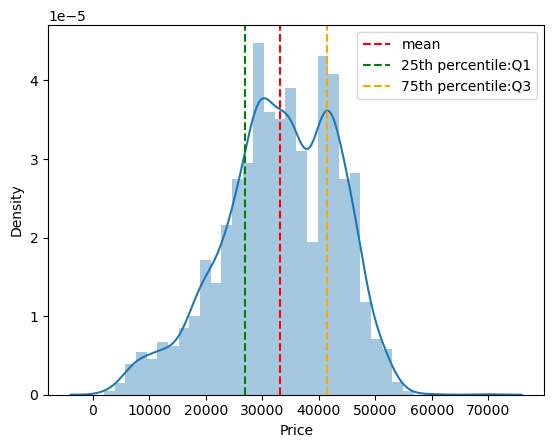

In [24]:
#LINE PLOT FOR PRICE
sns.distplot(data['Price'])
plt.axvline(x=np.mean(data['Price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [25]:
data['Price'].mode()

0    40240.0
Name: Price, dtype: float64

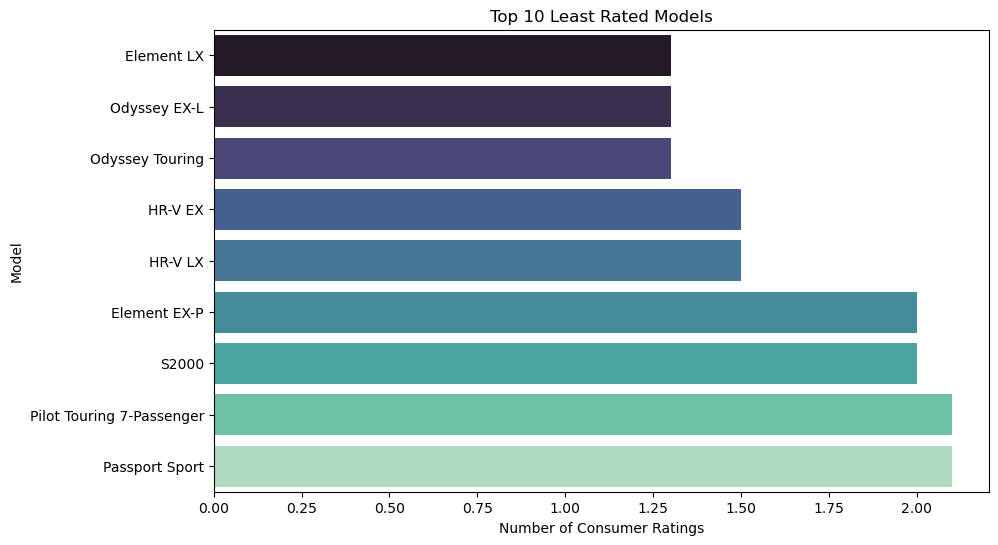

In [26]:
# Select the 10 least rated models
least_rated_models = data[data['Consumer_Rating'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()].nsmallest(10, 'Consumer_Rating')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Consumer_Rating', y='Model', data=least_rated_models, palette='mako')
plt.title('Top 10 Least Rated Models') 
plt.xlabel('Number of Consumer Ratings')
plt.show()

In [27]:
#mean, mode and median of performance ratings of each model

# Convert the Reviews column to numeric type
data['Performance_Rating'] = pd.to_numeric(data['Performance_Rating'])

# Calculate the mean, mode, and median number of reviews for each category
category_stats = data.groupby('Model')['Performance_Rating'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Print the results
print(category_stats)

                           mean  median  <lambda_0>
Model                                              
Accord Crosstour       4.700000    4.70         4.7
Accord Crosstour EX-L  4.750000    4.75         4.7
Accord EX              4.560000    4.55         4.7
Accord EX 1.5T         4.800000    4.80         4.8
Accord EX-L            4.620690    4.70         4.7
...                         ...     ...         ...
Ridgeline SE           4.600000    4.60         4.6
Ridgeline Sport        4.706452    4.70         4.7
S2000                  4.816667    4.80         4.7
S2000 Base             5.000000    5.00         5.0
S2000 Base (M6)        4.800000    4.80         4.8

[135 rows x 3 columns]


In [28]:
data['Condition'].value_counts()

New                1686
Used               1576
Honda Certified     225
Name: Condition, dtype: int64

<Axes: xlabel='Condition', ylabel='count'>

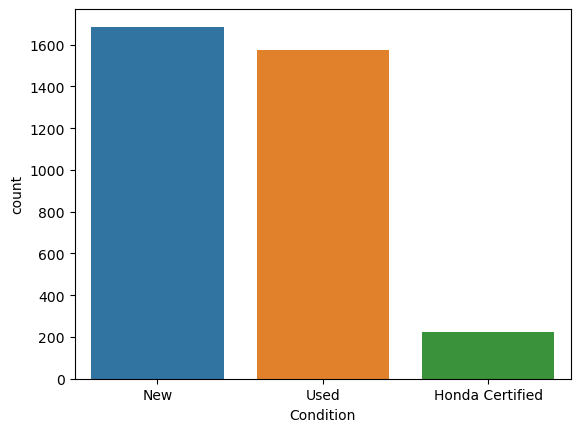

In [29]:
sns.countplot(x='Condition',data = data)

In [30]:
data['Price'].value_counts()

40240.0    57
41770.0    52
46500.0    51
30470.0    49
41375.0    42
           ..
28253.0     1
32905.0     1
32598.0     1
26495.0     1
17495.0     1
Name: Price, Length: 1840, dtype: int64

In [31]:
data['Consumer_Rating'].value_counts()

5.0    821
4.8    526
4.7    414
4.9    344
4.6    297
4.4    254
4.5    177
4.2    124
4.3     98
3.9     83
4.1     64
4.0     53
3.0     37
3.8     32
3.4     22
3.1     19
3.7     16
2.7     15
2.4     15
3.3     11
3.5     10
2.8      9
2.1      9
2.9      8
2.2      5
2.6      5
2.5      4
3.2      4
3.6      3
1.3      3
1.5      3
2.0      2
Name: Consumer_Rating, dtype: int64

In [32]:
data['Consumer_Review_#'].value_counts()

0       57
1       53
5       49
3       47
7       37
        ..
650      1
297      1
4140     1
806      1
3234     1
Name: Consumer_Review_#, Length: 888, dtype: int64

In [33]:
data['Exterior_Color'].value_counts()

Platinum White Pearl     666
Crystal Black Pearl      434
Lunar Silver Metallic    267
Modern Steel Metallic    233
Sonic Gray Pearl         216
                        ... 
Eternal Blue Pearl         1
Desert Mist Metallic       1
Pearl White                1
PEWTER                     1
Crimson Pearl              1
Name: Exterior_Color, Length: 140, dtype: int64

In [34]:
data['Interior_Color'].value_counts()

Black                           2307
Gray                             681
Beige                            198
Ivory                             73
Mocha                             46
Black / Red                       42
Tan                               16
Blk Lth                           12
Black / Gray                      10
Red                                8
Red / Black                        8
Truffle                            6
Nh-883p/Black                      6
Black / Ivory                      6
Grey                               5
Black/Red                          5
Blue                               4
Gray / Blue                        4
Blk Fabric W/Synthetic Lt          3
NH-912P/BLACK                      2
Cream                              2
Select                             2
Parchment                          2
Titanium                           2
Silver                             2
NH-731P/BLACK                      2
Interior                           1
.

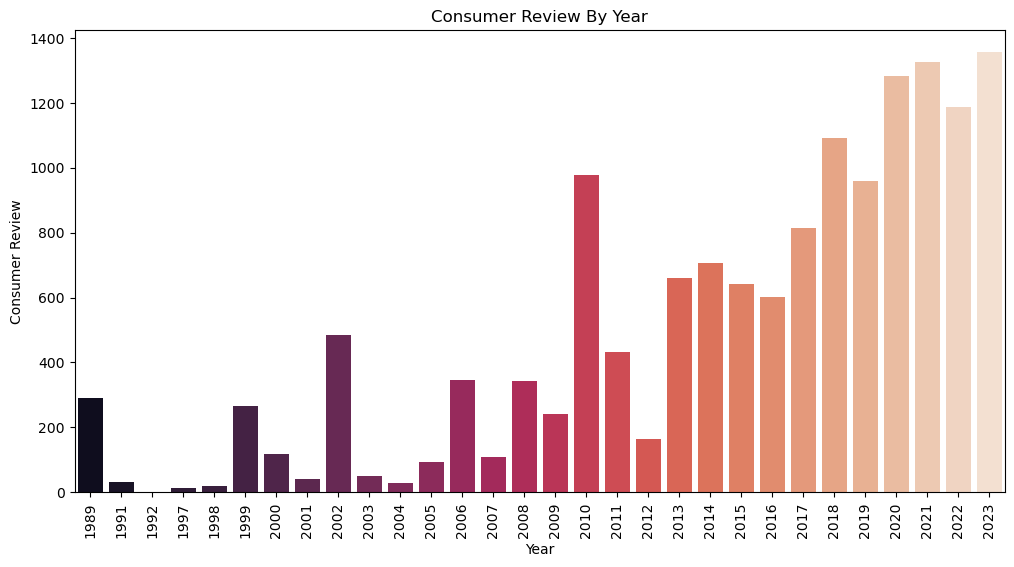

In [35]:
# Group by year and calculate mean of consumer review
consumer_review_by_year = data.groupby('Year')['Consumer_Review_#'].mean().reset_index()

# Sort by average mileage in descending order
consumer_review_by_year.sort_values(by='Consumer_Review_#', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Consumer_Review_#', data=consumer_review_by_year, palette='rocket')
plt.xticks(rotation=90)
plt.title('Consumer Review By Year')
plt.xlabel('Year')
plt.ylabel('Consumer Review')
plt.show()

<Axes: >

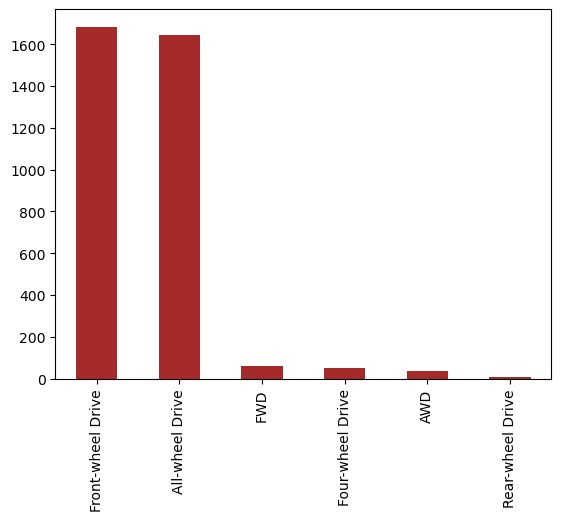

In [36]:
data['Drivetrain'].value_counts().plot(kind = 'bar',color = 'brown')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'All-wheel Drive'),
  Text(1, 0, 'Front-wheel Drive'),
  Text(2, 0, 'FWD'),
  Text(3, 0, 'AWD'),
  Text(4, 0, 'Four-wheel Drive'),
  Text(5, 0, 'Rear-wheel Drive')])

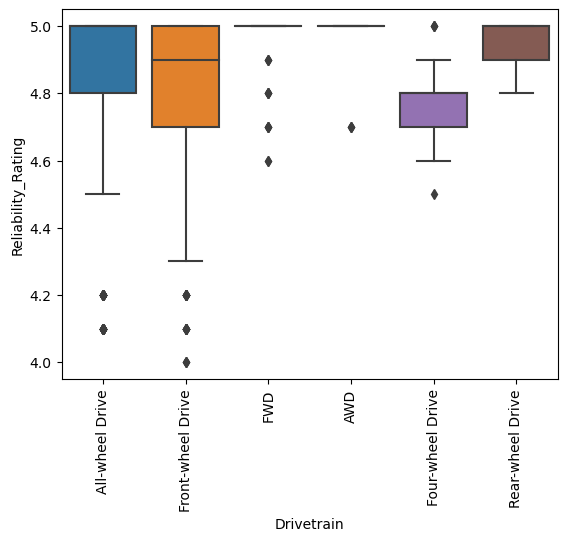

In [37]:
sns.boxplot(x='Drivetrain', y='Reliability_Rating', data=data)
plt.xticks(rotation=90)

In [38]:
data['MPG'].value_counts()

27.82245    738
22.50000    474
21.50000    321
23.50000    297
32.00000    227
22.00000    158
29.50000    119
42.50000     99
31.00000     84
27.00000     83
21.00000     77
34.00000     73
33.00000     64
35.50000     48
28.50000     45
33.50000     45
23.00000     44
48.00000     44
30.00000     43
37.50000     41
29.00000     37
25.00000     34
37.00000     31
35.00000     27
52.00000     23
34.50000     21
26.00000     19
24.00000     19
31.50000     19
36.00000     15
27.50000     14
28.00000     11
52.50000     10
18.00000     10
26.50000     10
32.50000      9
36.50000      9
19.00000      7
17.50000      6
39.50000      6
25.50000      5
24.50000      5
44.00000      4
47.00000      3
19.50000      2
41.50000      2
48.50000      1
13.00000      1
30.50000      1
21.30000      1
45.50000      1
Name: MPG, dtype: int64

In [39]:
data['Fuel_Type'].value_counts()

Gasoline                  3044
Hybrid                     439
5-Speed A/T                  1
A/T                          1
6-Speed M/T                  1
Compressed Natural Gas       1
Name: Fuel_Type, dtype: int64

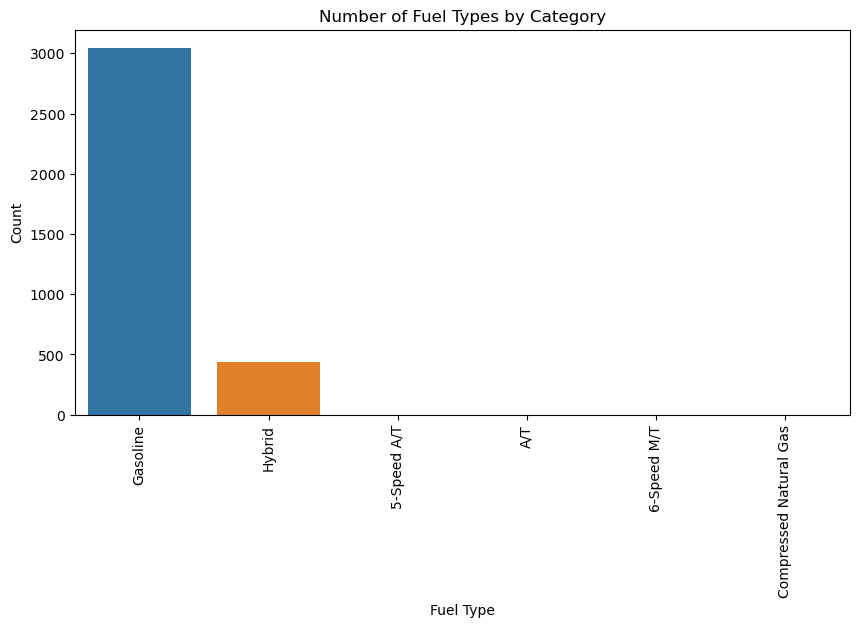

In [40]:
#bar graph of number of fueltypes
category_counts = data["Fuel_Type"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Number of Fuel Types by Category")
plt.show()

In [41]:
data['Transmission'].value_counts()

Automatic CVT                                   1295
9-Speed Automatic                               1012
Automatic                                        241
10-Speed Automatic                               241
6-Speed Automatic                                184
5-Speed Automatic                                136
6-Speed Manual                                   103
Variable                                          72
9-SPEED A/T                                       23
continuously variable w/sport mode                17
electronic continuously variable                  16
CVT                                               15
4-Speed Automatic                                 15
continuously variable                             13
5-Speed Manual                                    10
5-SPEED A/T                                        9
continuously variable automatic                    7
continuously variable (m cvt)                      7
eCVT                                          

In [42]:
data['Engine'].value_counts()

3.5L V6 24V GDI SOHC                                                1445
1.5L I4 16V GDI DOHC Turbo                                           657
2.0L I4 16V GDI DOHC Hybrid                                          153
2.0L I4 16V MPFI DOHC Hybrid                                         147
1.8L I4 16V MPFI SOHC                                                112
2.0L I4 16V GDI DOHC                                                 108
4 Cylinder Engine                                                    107
3.5L V6 24V MPFI SOHC                                                100
2.0L I4 16V GDI DOHC Turbo                                            97
2.0L I4 16V MPFI DOHC                                                 89
V6 Cylinder Engine                                                    72
2.4L I4 16V MPFI DOHC                                                 70
Regular Unleaded V-6 3.5 L/212                                        60
1.5L I4 16V MPFI DOHC Hybrid                       

In [43]:
data['Mileage'].value_counts()

5         298
0         212
10        160
3         153
2         132
         ... 
31775       1
19625       1
137906      1
16983       1
88050       1
Name: Mileage, Length: 1907, dtype: int64

<Axes: ylabel='Frequency'>

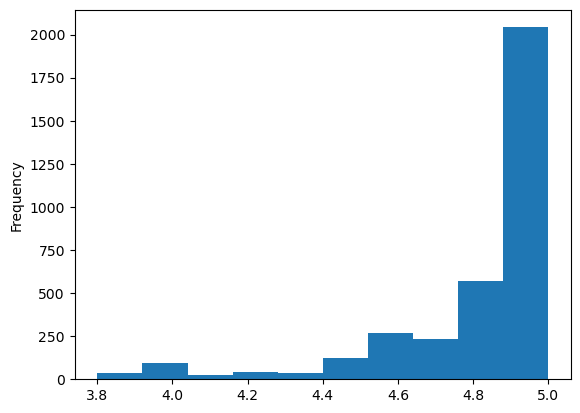

In [44]:
#Histogram for comfort rating
data['Comfort_Rating'].plot.hist()

<Axes: >

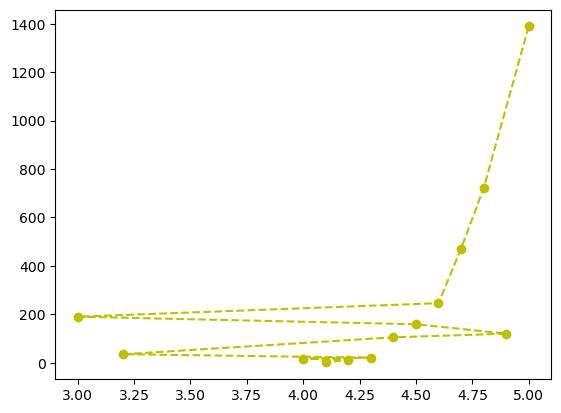

In [45]:
#line PLOT FOR INTERIOR DESIGN RATING
data['Interior_Design_Rating'].value_counts().plot(color='y',linestyle='dashed',marker='o',label = 'Interior Design Rating')

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/4259822815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Performance_Rating'])


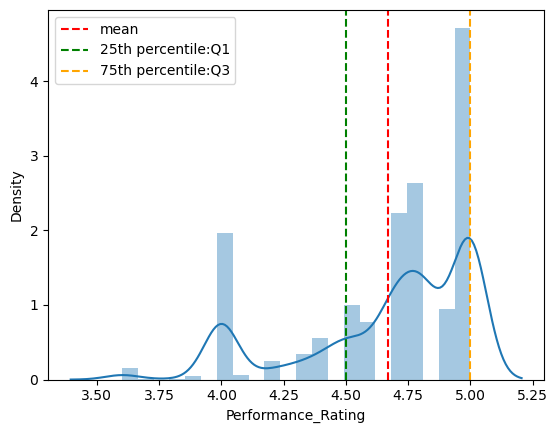

In [46]:
#LINE PLOT FOR PERFORMANCE RATING
sns.distplot(data['Performance_Rating'])
plt.axvline(x=np.mean(data['Performance_Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Performance_Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Performance_Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

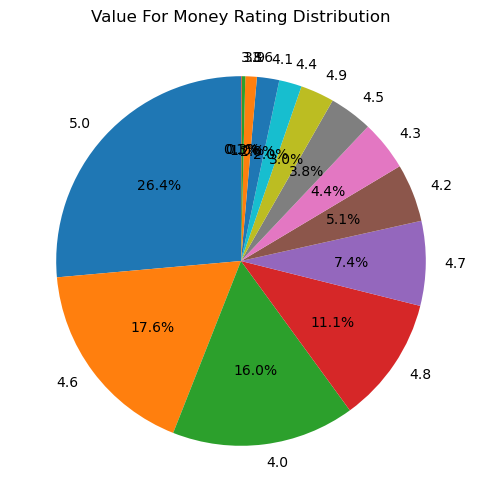

In [47]:
# Count the values for money review
value_for_money_counts = data['Value_For_Money_Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_for_money_counts, labels=value_for_money_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Value For Money Rating Distribution')
plt.show()
#data['Value_For_Money_Rating'].value_counts().plot.area(x='Rating',y='Frequency',stacked='True')

<Axes: >

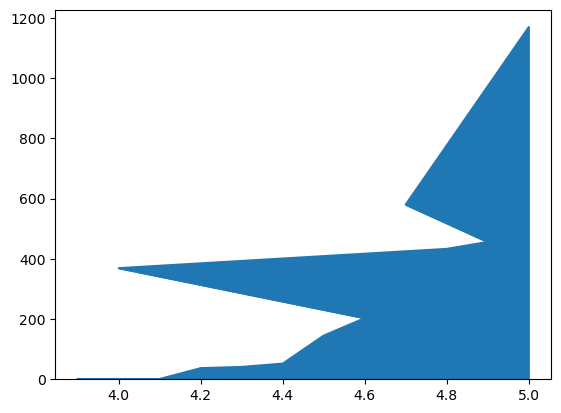

In [48]:
data['Exterior_Styling_Rating'].value_counts().plot.area(x='Rating',y='Frequency',stacked='True')

In [49]:
data['Reliability_Rating'].value_counts()

5.0    1833
4.8     658
4.7     318
4.9     290
4.6     169
4.5      80
4.1      46
4.2      37
4.4      27
4.3      26
4.0       3
Name: Reliability_Rating, dtype: int64

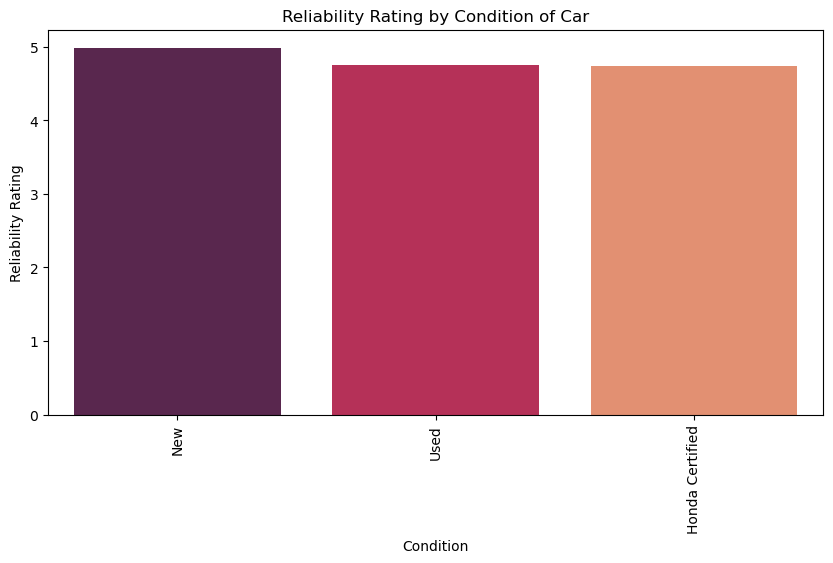

In [50]:
# Group by condition and calculate mean of Reliability Ratings
reliability_rating_by_condition = data.groupby('Condition')['Reliability_Rating'].mean().reset_index()

# Sort by average mileage in descending order
reliability_rating_by_condition.sort_values(by='Reliability_Rating', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(10,5))
sns.barplot(x='Condition', y='Reliability_Rating', data=reliability_rating_by_condition, palette='rocket')
plt.xticks(rotation=90)
plt.title('Reliability Rating by Condition of Car')
plt.xlabel('Condition')
plt.ylabel('Reliability Rating')
plt.show()

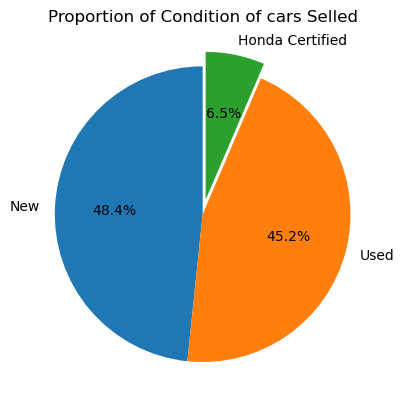

In [51]:
# Count the number of seller types
new = data[data['Condition'] == 'New'].shape[0]
used = data[data['Condition'] == 'Used'].shape[0]
certi = data[data['Condition'] == 'Honda Certified'].shape[0]

# Create a pie chart
plt.pie([new, used, certi], labels=['New','Used', 'Honda Certified'], autopct='%1.1f%%', startangle=90, explode=[0,0,0.1])
plt.title('Proportion of Condition of cars Selled')
plt.show()

In [52]:
data['Seller_Type'].value_counts()

Dealer        3484
Individual       3
Name: Seller_Type, dtype: int64

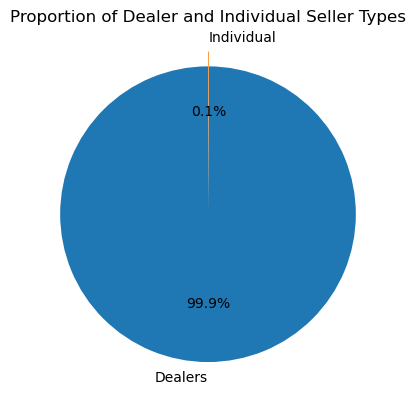

In [53]:
# Count the number of seller types
dealers = data[data['Seller_Type'] == 'Dealer'].shape[0]
individual = data[data['Seller_Type'] == 'Individual'].shape[0]

# Create a pie chart
plt.pie([dealers, individual], labels=['Dealers', 'Individual'], autopct='%1.1f%%', startangle=90, explode=[0, 0.1])
plt.title('Proportion of Dealer and Individual Seller Types')
plt.show()

In [54]:
data['State'].value_counts()

IL       230
CA       215
TX       214
FL       205
OH       189
IN       163
NY       150
NC       139
VA       131
MN       130
NJ       107
PA        96
MA        91
GA        87
WI        87
IA        85
WA        85
LA        75
MO        73
MI        72
MD        66
TN        65
OK        59
AZ        58
CO        55
KY        54
CT        53
NE        47
AL        45
KS        45
OR        44
AR        43
SC        33
NV        32
WV        17
UT        17
ID        17
NH        16
ND        15
SD        14
DE        12
NM        10
VT        10
MS         9
ME         8
WY         5
AK         4
MT         3
HI         3
RI         2
Route      1
MO-22      1
Name: State, dtype: int64

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/2166416774.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x= data.groupby(data.index).mean().index,
/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/2166416774.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = data.groupby(data.index).mean()['MPG'])


<Axes: ylabel='MPG'>

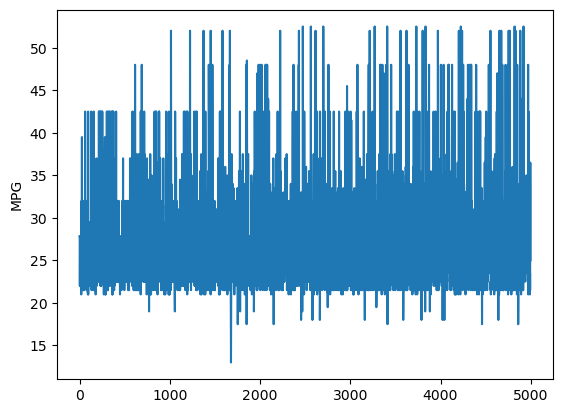

In [55]:
#Is there any time trend in MPG value
sns.lineplot(x= data.groupby(data.index).mean().index, 
             y = data.groupby(data.index).mean()['MPG'])

<Axes: xlabel='Fuel_Type', ylabel='MPG'>

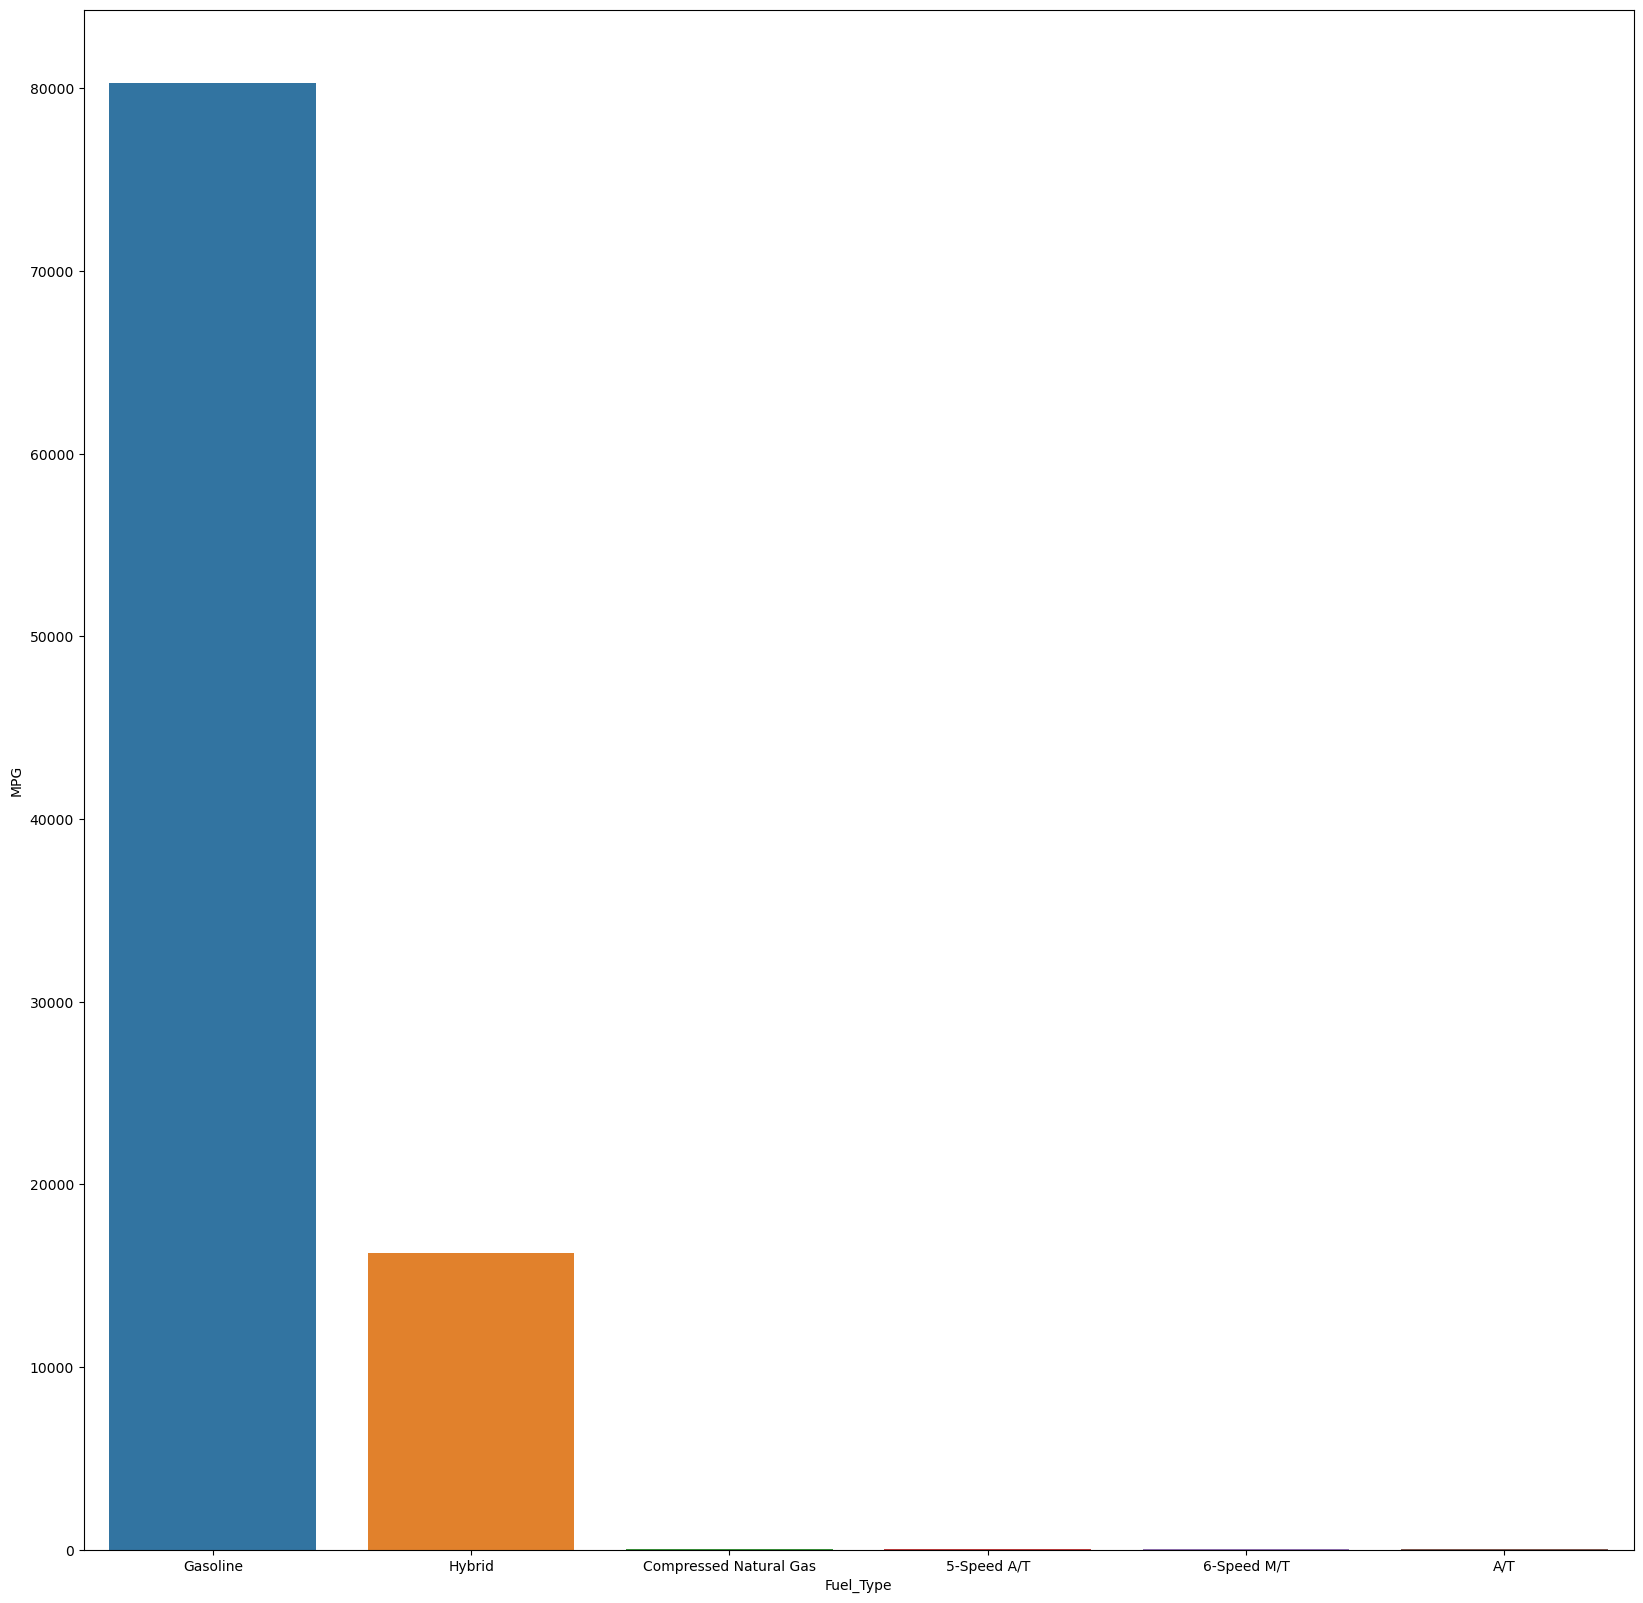

In [56]:
#which fuel type has more MPG
cat=data[["Fuel_Type", "MPG"]].groupby(['Fuel_Type'], as_index=False).sum().sort_values(by='MPG', ascending=False)
plt.figure(figsize=(20,20))
sns.barplot(x='Fuel_Type', y='MPG', data=cat)

<Axes: xlabel='Transmission', ylabel='Comfort_Rating'>

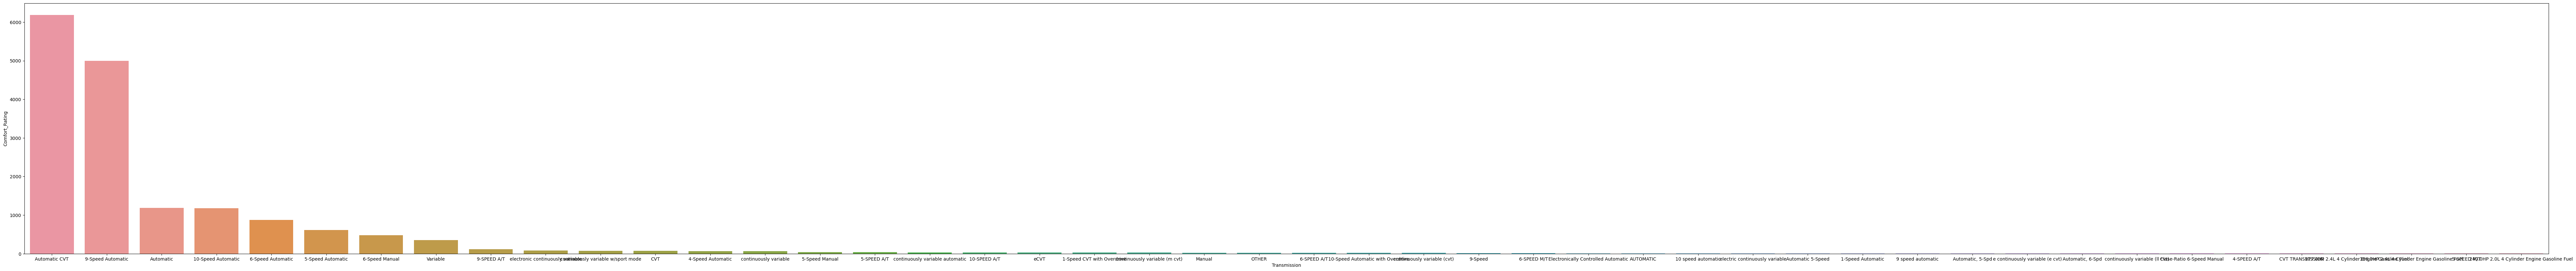

In [57]:
#which transmission has more comfort rating?
cat=data[["Transmission", "Comfort_Rating"]].groupby(['Transmission'], as_index=False).sum().sort_values(by='Comfort_Rating', ascending=False)
plt.figure(figsize=(100,10))
sns.barplot(x='Transmission', y='Comfort_Rating', data=cat)

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/2235519401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(data.corr(),2), annot=True)


<Axes: >

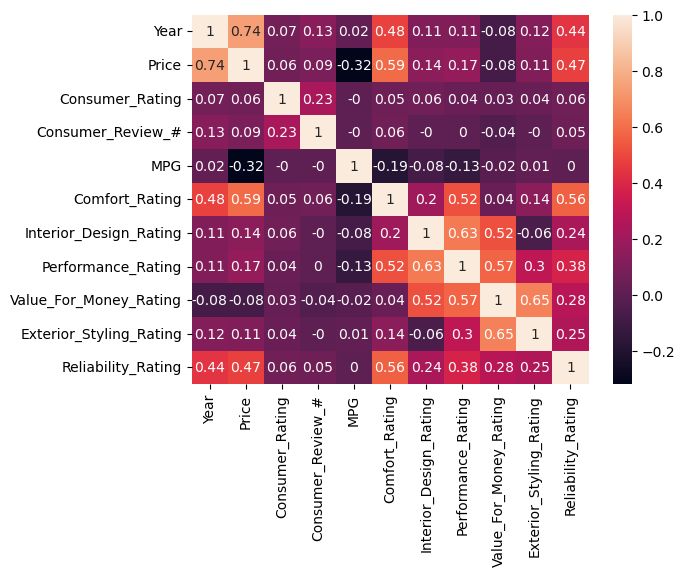

In [58]:
#To show relationship between 2 variables of all the possible columns in dataset 
sns.heatmap(np.round(data.corr(),2), annot=True)

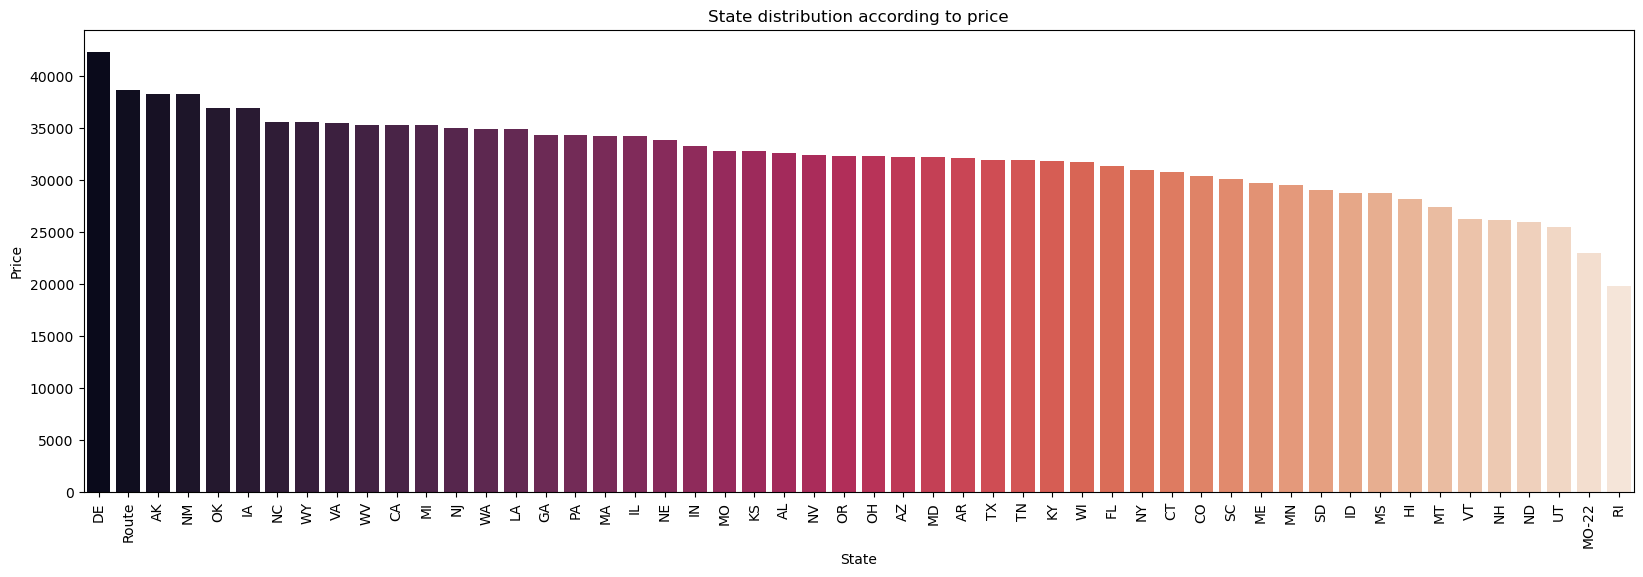

In [59]:
# Group by year and calculate mean of consumer review
State_Price = data.groupby('State')['Price'].mean().reset_index()

# Sort by average mileage in descending order
State_Price.sort_values(by='Price', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(20,6))
sns.barplot(x='State', y='Price', data=State_Price, palette='rocket')
plt.xticks(rotation=90)
plt.title('State distribution according to price')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/1983291905.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('State').sum()
/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/1983291905.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)


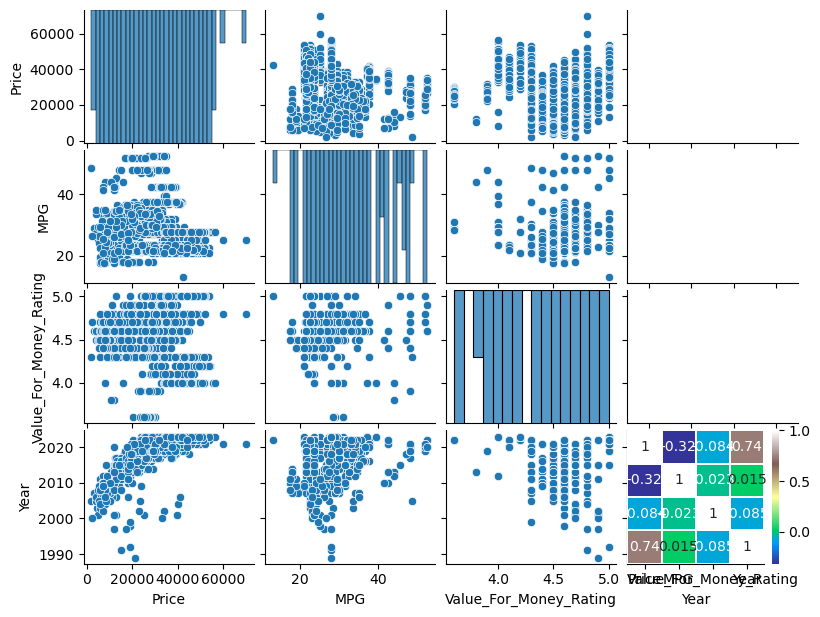

In [60]:
#pairwise relationship 
data.groupby('State').size()
data.groupby('State').sum()

numeric_columns = ['Mileage','Price','MPG','Value_For_Money_Rating','Year']
sns.pairplot(data[numeric_columns])
sns.heatmap(data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/1330978307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Model').sum()
/var/folders/_j/7st63fcx4316_yxk7qk55_rw0000gn/T/ipykernel_1527/1330978307.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)


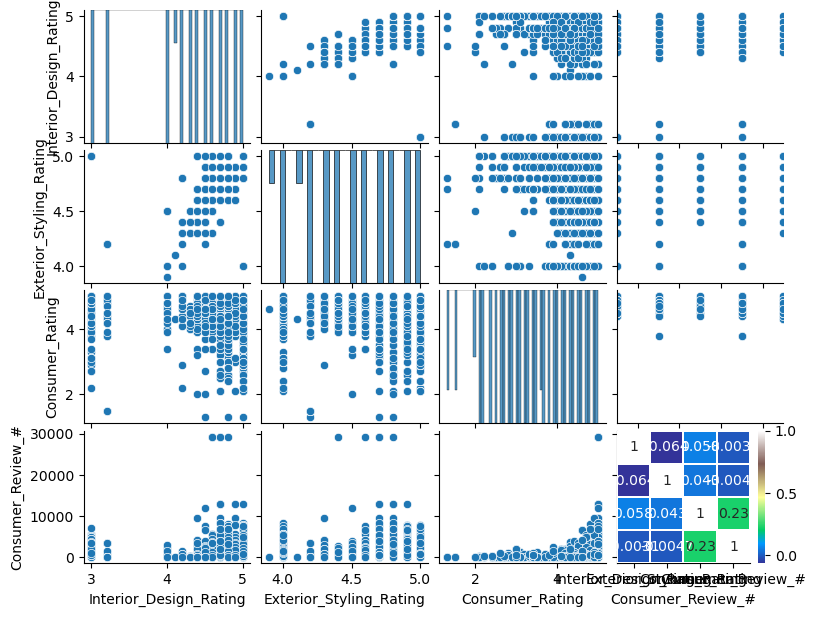

In [61]:
#pairwise relationship between variables(model) with data set
data.groupby('Model').size()
data.groupby('Model').sum()

numeric_columns = ['Exterior_Color','Interior_Color','Interior_Design_Rating','Exterior_Styling_Rating','Consumer_Rating','Consumer_Review_#']
sns.pairplot(data[numeric_columns])
sns.heatmap(data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

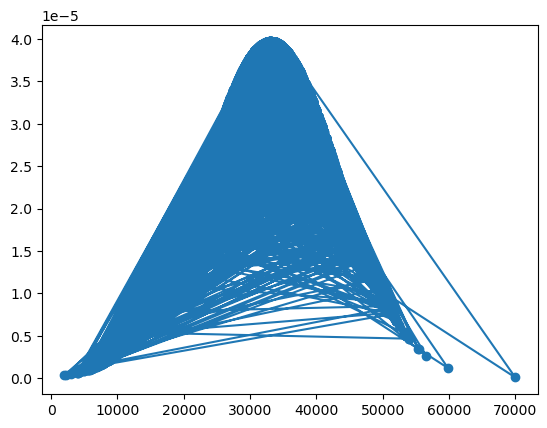

In [62]:
#Normal distribution for price
h = data['Price']

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
pl.plot(h,fit,'-o')
pl.show()   